# Hamiltonien quantique

On considère l'Hamiltonien quantique de l'oscillateur harmonique
$$
H_0\psi(x, t)=\frac 12\left(-\frac{\partial ^2}{\partial x ^2}+x ^2\right)\psi(x,t)
$$
Calculer et dessiner la solution de l'équation de Schrödinger correspondante:
$$
i\hbar\frac{\partial}{\partial t}\psi(x,t)=\left(-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right)\psi(x,t)
$$
avec comme condition initiale:
$$
\psi(x,0)= e^{-4(x-2)^2}
$$

Procéder ainsi:

 * Décomposer cette condition initiale sur les fonctions propres de l'Hamiltonien ($\varphi_n=e^{-x^2/2}h_n(x)$ ou $h_n$ est le polynôme d'Hermite d'ordre $n$)
 * Calculer la solution en fonction de cette décomposition (utiliser la formule dérivée au cours)
 * Afficher la densité de probabilité $|\psi(x,t)|^2$ sous forme d'image ([imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)): la variable $t$ en axe horizontal et la variable $x$ en axe vertical
 * Calculer la valeur moyenne $\langle Q(t)\rangle$ de la position en fonction du temps et la dessiner sur l'image 

 Prendre par exemple $t\in[0,50]$, $x\in[-5,5]$, nombre de coefficients dans la décomposition: 30.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import polynomial as npoly

tt = np.arange(0, 50, .1)
tidx = np.arange(0, len(tt), 50)
dx = .01
xx = np.arange(-5, 5, dx)
xidx = np.arange(0, len(xx), 200)

ncoef = 30
c0 = np.exp(xx**2/2-4*(xx-2.)**2)
c1 = npoly.hermite.hermfit(xx, c0, ncoef)
coefs = c1*np.exp(-1j*tt[:,None]*(1/2+np.arange(ncoef+1)))
phisq = np.zeros((len(tt), len(xx)))
qmean = np.zeros(len(tt))
for tn, t in enumerate(tt):
    phit = np.exp(-xx**2/2)*npoly.Hermite(coefs[tn,:])(xx)
    a2 = np.absolute(phit)**2
    a2 /= a2.sum()
    phisq[tn,:] = a2/dx
    qmean[tn] = (xx*a2).sum()

fig,ax = plt.subplots(figsize=(12, 7))
ax.imshow(np.transpose(phisq), aspect='auto', vmin=0, vmax=1, extent=[0, 50, 5, -5])
ax.plot(tt, qmean, 'r-')

plt.show()

## Fonctions propres et équations différentielles

Intégrer l'équation différentielle suivante (correspondant à l'équation aux valeurs propres de $H_0$):
$$
\varphi''(x)=(x^2-2\lambda)\varphi(x)
$$
Prendre comme condition initiale 

 * $\varphi(0)=1$, $\varphi'(0)=0$ pour $\lambda=0.25,0.5,0.75$
 * $\varphi(0)=0$, $\varphi'(0)=1$ pour $\lambda=1.45,1.5,1.55$

Utiliser DOPRI5 (voir séries précédentes) avec $t<4$. 

Dessiner les résultats: quelles solutions sont (probablement) de carré intégrable?

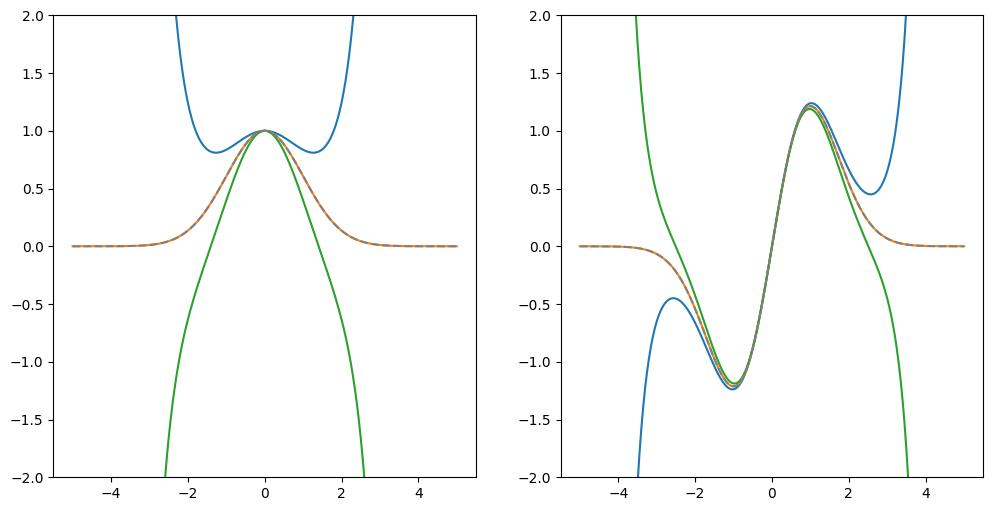

In [2]:
h0 = np.loadtxt("data/qm025.txt")
h1 = np.loadtxt("data/qm05.txt")
h2 = np.loadtxt("data/qm075.txt")
h20 = np.loadtxt("data/qm145.txt")
h21 = np.loadtxt("data/qm15.txt")
h22 = np.loadtxt("data/qm155.txt")
reva = range(h0.shape[0]-1, 0, -1)
xx = np.concatenate([-h2[reva,0],h2[:,0]])

fig,ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(xx, np.concatenate([h0[reva,1],h0[:,1]]), '-')
ax[0].plot(xx, np.concatenate([h1[reva,1],h1[:,1]]), '-')
ax[0].plot(xx, np.concatenate([h2[reva,1],h2[:,1]]), '-')
ax[0].plot(xx, np.polynomial.Hermite((1,0))(xx)*np.exp(-xx**2/2), '--', color='grey')
ax[0].set_ylim((-2,2))
ax[1].plot(xx, np.concatenate([-h20[reva,1],h20[:,1]]), '-')
ax[1].plot(xx, np.concatenate([-h21[reva,1],h21[:,1]]), '-')
ax[1].plot(xx, np.concatenate([-h22[reva,1],h22[:,1]]), '-')
ax[1].plot(xx, np.polynomial.Hermite((0,1))(xx)*np.exp(-xx**2/2), '--', color='grey')
ax[1].set_ylim((-2,2))

plt.show()